In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_csv('/Users/ritaguan/Desktop/nb_py.csv')

In [12]:
df

,Unnamed: 0,Unnamed: 0.1,created_at,lang,author_id,text,id,text_token,emoji_free_tweets,url_free_tweets,...,lemmas,lemmas_back_to_text,lemma_tokens,positive_sentiment,negative_sentiment,sentiment_tokens,len_tokens,has_positive,has_negative,label
0,1,1,2022-09-09T23:59:21.000Z,en,1515895379329708032,RT @dvdmckay: We’ve got a new paper out on cli...,1568388623288107008,"['@dvdmckay:', 'we’ve', 'got', 'new', 'paper',...",RT @dvdmckay: We’ve got a new paper out on cli...,RT @dvdmckay: We’ve got a new paper out on cli...,...,"['rt', '@dvdmckay', 'new', 'paper', 'tippingpo...",rt @dvdmckay new paper tippingpoint @sciencema...,"['rt', 'dvdmckay', 'new', 'paper', 'tippingpoi...",['exceed'],[],['exceed'],1,1,0,1
1,2,2,2022-09-09T23:59:16.000Z,en,1547977583714660355,RT @DEATHBALL13: Let's not forget good old #Ch...,1568388601926524928,"['@deathball13:', ""let's"", 'forget', 'good', '...",RT @DEATHBALL13: Let's not forget good old #Ch...,RT @DEATHBALL13: Let's not forget good old #Ch...,...,"['rt', '@deathball13', 'let', 'forget', 'good'...",rt @deathball13 let forget good old charlieche...,"['rt', 'deathball13', 'let', 'forget', 'good',...",['good'],['propaganda'],"['good', 'propaganda']",2,1,1,0
2,3,3,2022-09-09T23:58:51.000Z,en,1302354043793223680,RT @EnergyLiveNews: Prime Minister Liz Truss a...,1568388497152638978,"['@energylivenews:', 'prime', 'minister', 'liz...",RT @EnergyLiveNews: Prime Minister Liz Truss a...,RT @EnergyLiveNews: Prime Minister Liz Truss a...,...,"['rt', '@energylivenews', 'prime', 'minister',...",rt @energylivenews prime minister liz truss an...,"['rt', 'energylivenews', 'prime', 'minister', ...",[],['freeze'],['freeze'],1,0,1,-1
3,4,4,2022-09-09T23:58:45.000Z,en,126075164,RT @EnergyHouseVA: Energy Crisis Will Be Short...,1568388472695853056,"['@energyhouseva:', 'energy', 'crisis', 'short...",RT @EnergyHouseVA: Energy Crisis Will Be Short...,RT @EnergyHouseVA: Energy Crisis Will Be Short...,...,"['rt', '@energyhouseva', 'energy', 'crisis', '...",rt @energyhouseva energy crisis short live rea...,"['rt', 'energyhouseva', 'energy', 'crisis', 's...",[],['crisis'],['crisis'],1,0,1,-1
4,5,5,2022-09-09T23:58:39.000Z,en,80890155,RT @NickKristof: We just lost power here at @K...,1568388444430245888,"['@nickkristof:', 'lost', 'power', '@kristoffa...",RT @NickKristof: We just lost power here at @K...,RT @NickKristof: We just lost power here at @K...,...,"['rt', '@nickkristof', 'lose', 'power', '@kris...",rt @nickkristof lose power @kristoffarm rural ...,"['rt', 'nickkristof', 'lose', 'power', 'kristo...",[],['lose'],['lose'],1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,93,93,2022-09-09T23:35:20.000Z,en,3418339671,RT @i_ameztoy: Summer 2022 was warmest on reco...,1568382577924534272,"['@i_ameztoy:', 'summer', '2022', 'warmest', '...",RT @i_ameztoy: Summer 2022 was warmest on reco...,RT @i_ameztoy: Summer 2022 was warmest on reco...,...,"['rt', '@i_ameztoy', 'summer', '2022', 'warm',...",rt @i_ameztoy summer 2022 warm record svalbard...,"['rt', 'i_ameztoy', 'summer', '2022', 'warm', ...",['warm'],[],['warm'],1,1,0,1
66,94,94,2022-09-09T23:34:45.000Z,en,2650617704,RT @dvdmckay: We’ve got a new paper out on cli...,1568382433078419457,"['@dvdmckay:', 'we’ve', 'got', 'new', 'paper',...",RT @dvdmckay: We’ve got a new paper out on cli...,RT @dvdmckay: We’ve got a new paper out on cli...,...,"['rt', '@dvdmckay', 'new', 'paper', 'tippingpo...",rt @dvdmckay new paper tippingpoint @sciencema...,"['rt', 'dvdmckay', 'new', 'paper', 'tippingpoi...",['exceed'],[],['exceed'],1,1,0,1
67,95,95,2022-09-09T23:34:30.000Z,en,225901906,RT @UNFPA_Arabic: Supporting women and girls i...,1568382369853480961,"['@unfpa_arabic:', 'supporting', 'women', 'gir...",RT @UNFPA_Arabic: Supporting women and girls i...,RT @UNFPA_Arabic: Supporting women and girls i...,...,"['rt', '@unfpa_arabic', 'support', 'woman', 'g...",rt @unfpa_arabic support woman girl address cl...,"['rt', 'unfpa_arabic', 'support',

(array([11., 10., 17.,  4.,  5.,  4.,  5.,  5.,  4.,  5.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

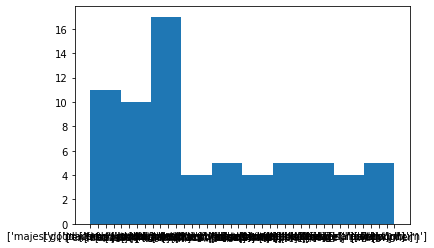

In [24]:
#Class Distribution
plt.hist(df['sentiment_tokens'])

In [22]:
#tfidf, train test data split
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['sentiment_tokens']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features,df['label'], test_size=0.2)

CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.50      1.00      0.67         5
           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         4

    accuracy                           0.64        14
   macro avg       0.50      0.60      0.52        14
weighted avg       0.54      0.64      0.56        14



/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


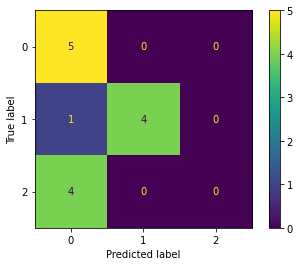

In [23]:
# Baseline Model
baseline_predict = LinearSVC(dual=False).fit(X_train,y_train).predict(X_test) 
print("CLASSIFICATION REPPORT: ", classification_report(y_test,baseline_predict))
cm = confusion_matrix(y_test, baseline_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [14]:
# SVM classifier
model = SVC()
model.fit(X_train,y_train)

SVC()

In [15]:
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [16]:
def confusion_plot(y_data, y_pred):
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    print("ACCURACY: ", accuracy_score(y_data, y_pred) )
    print("CLASSIFICATION REPPORT: ", classification_report(y_data,y_pred))
    print(confusion_matrix(y_data, y_pred))
    plt.show()

------TRAINING------
ACCURACY:  0.5357142857142857
CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.43      1.00      0.61        20
           0       1.00      0.56      0.71        18
           1       0.00      0.00      0.00        18

    accuracy                           0.54        56
   macro avg       0.48      0.52      0.44        56
weighted avg       0.48      0.54      0.45        56

[[20  0  0]
 [ 8 10  0]
 [18  0  0]]


/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


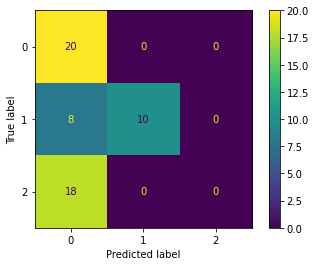

------TEST------
ACCURACY:  0.7857142857142857
CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.70      1.00      0.82         7
           0       1.00      0.57      0.73         7

    accuracy                           0.79        14
   macro avg       0.85      0.79      0.78        14
weighted avg       0.85      0.79      0.78        14

[[7 0]
 [3 4]]


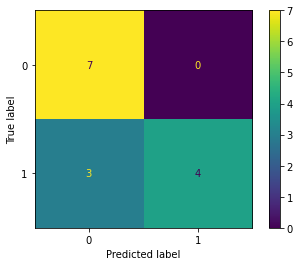

In [17]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)